In [1]:
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.callbacks import TensorBoard

from tensorflow.keras.datasets import mnist

D:\Python\AI\venv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
((train_images, train_classes), (test_images, test_classes)) = mnist.load_data()

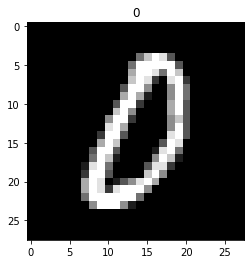

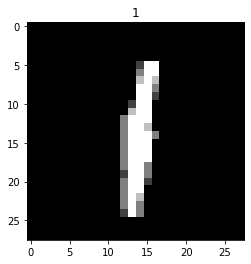

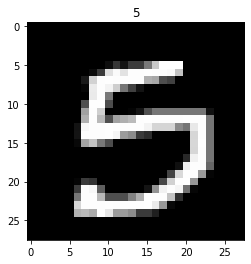

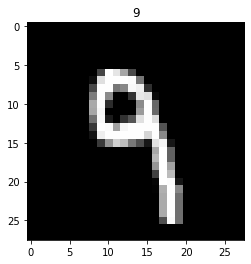

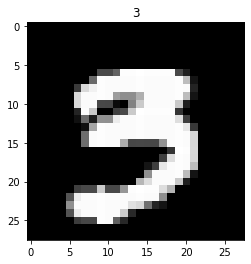

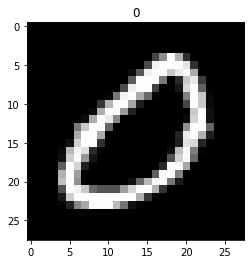

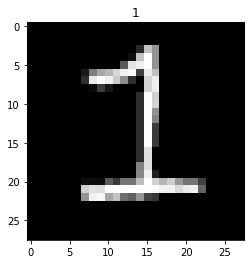

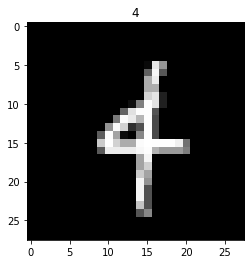

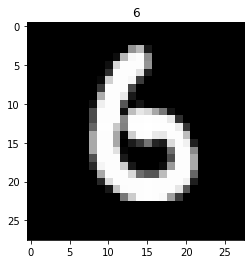

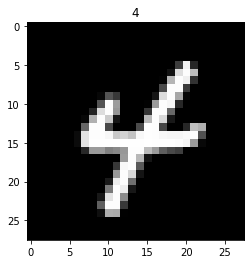

In [4]:
for i in np.random.choice(range(len(train_images)), 10):
    plt.imshow(train_images[i], cmap="gray")
    plt.title(train_classes[i])
    plt.show()

In [5]:
input_shape = train_images[0].shape
num_classes = len(set(train_classes))

In [6]:
model = Sequential([
    Input(input_shape),
    Flatten(),
    
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    
    Dense(num_classes, activation="softmax")
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 10)                170       
                                                                 
Total params: 53018 (207.10 KB)
Trainable params: 53018 (207.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [9]:
model.fit(train_images, train_classes, epochs=10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 1.5301 - accuracy: 0.5180
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0283 - accuracy: 0.6623
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8488 - accuracy: 0.7142
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7687 - accuracy: 0.7324
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7387 - accuracy: 0.7360
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7264 - accuracy: 0.7404
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7200 - accuracy: 0.7430
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7240 - accuracy: 0.7437
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7303 - accuracy: 0.7434
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7

In [15]:
conv_model = Sequential([
    Input(input_shape),
    Reshape((28,28,1)),
    
    Conv2D(64, kernel_size=5, activation="relu"),
    MaxPooling2D(),
    Conv2D(32, kernel_size=3, activation="relu"),
    MaxPooling2D(),
    Conv2D(16, kernel_size=2, activation="relu"),
    MaxPooling2D(),
    
    Flatten(),
    
    Dense(num_classes, activation="softmax")
])

In [16]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 16)         

In [17]:
conv_model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [18]:
conv_model.fit(train_images, train_classes, epochs=10, callbacks=[TensorBoard()], validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.4657 - accuracy: 0.8940 - val_loss: 0.1165 - val_accuracy: 0.9680
Epoch 2/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.1177 - accuracy: 0.9688 - val_loss: 0.1013 - val_accuracy: 0.9743
Epoch 3/10
1688/1688 [==============================] - 19s 11ms/step - loss: 0.0951 - accuracy: 0.9751 - val_loss: 0.0621 - val_accuracy: 0.9847
Epoch 4/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0841 - accuracy: 0.9789 - val_loss: 0.0682 - val_accuracy: 0.9840
Epoch 5/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0778 - accuracy: 0.9806 - val_loss: 0.0773 - val_accuracy: 0.9847
Epoch 6/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0759 - accuracy: 0.9817 - val_loss: 0.0903 - val_accuracy: 0.9820
Epoch 7/10
1688/1688 [==============================] - 18s 11ms/step - loss: 0.0723 - accuracy: 0.9830 - val_loss: 0.0732 -